<a href="https://colab.research.google.com/github/korede97/Hamoye_ML_Externship/blob/main/Weekly_ML_CodeClub001_DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = '15px' font color='navy'>The Complete Machine Learning Externship:</font> 

<font size = '6px' font color='red'>Weekly ML Code Club:001</font> 

<font size  = 5 font color = 'blue'>Data Wrangling <font/>


Useful references


*   [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)
*   [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)



### Load Data

In [1]:
# Import all necessary libraries 
import pandas as pd
import numpy as np

In [2]:
def load_data(url):
  df = pd.read_csv(url)
  # print(df.head())
  print("Number of dimensions:", df.ndim)
  print("Shape of dataframe:",df.shape)
  return(df)

In [3]:
# Declare a variable for each csv file and read the data
cellPhone_url = "https://raw.githubusercontent.com/zalihat/cell_phone_dataset/master/cell_phones.csv"
population_url = "https://raw.githubusercontent.com/zalihat/cell_phone_dataset/master/population1.csv"
geoCountry_url = "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv"

In [4]:
cellPhone_df = load_data(cellPhone_url)
cellPhone_df.head()

Number of dimensions: 2
Shape of dataframe: (11640, 3)


,Country,year,cell_phones_total
0,Afghanistan,1960,0.0
1,Afghanistan,1961,0.0
2,Afghanistan,1962,0.0
3,Afghanistan,1963,0.0
4,Afghanistan,1964,0.0


In [5]:
population_df = load_data(population_url)
population_df.head()

Number of dimensions: 2
Shape of dataframe: (58695, 3)


,Country,year,population
0,Afghanistan,1800,3280000
1,Afghanistan,1801,3280000
2,Afghanistan,1802,3280000
3,Afghanistan,1803,3280000
4,Afghanistan,1804,3280000


In [6]:
geoCountry_df = load_data(geoCountry_url)
geoCountry_df.head()

Number of dimensions: 2
Shape of dataframe: (273, 21)


,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,un_sdg_ldc,un_sdg_region,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,True,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,True,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AI,americas,america


### Join Data



*   [Pandas merge() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)
*   [Pandas rename() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)



In [7]:
# Join the "cellphones" and 'population' dataframe (with an inner join on country and year)
cell_popl_df = pd.merge(cellPhone_df, population_df, how = 'inner', on=['Country','year'])
cell_popl_df.head()

,Country,year,cell_phones_total,population
0,Afghanistan,1960,0.0,9000000
1,Afghanistan,1961,0.0,9170000
2,Afghanistan,1962,0.0,9350000
3,Afghanistan,1963,0.0,9540000
4,Afghanistan,1964,0.0,9740000


In [8]:
cell_popl_df.shape

(11640, 4)

In [9]:
rename_cols = {'country':'geo', 'name':'Country'}
geoCountry_df.rename(columns = rename_cols, inplace = True)
geoCountry_df.head()

,geo,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,Country,un_sdg_ldc,un_sdg_region,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,True,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,True,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AI,americas,america


In [10]:
cell_popl_geo_df = pd.merge(cell_popl_df, geoCountry_df[['geo','Country']], how = 'left', on= 'Country')
cell_popl_geo_df.head()

,Country,year,cell_phones_total,population,geo
0,Afghanistan,1960,0.0,9000000,afg
1,Afghanistan,1961,0.0,9170000,afg
2,Afghanistan,1962,0.0,9350000,afg
3,Afghanistan,1963,0.0,9540000,afg
4,Afghanistan,1964,0.0,9740000,afg


In [11]:
cell_popl_geo_df.shape

(11640, 5)

### Make Features 


*   [str.upper() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html#pandas.Series.str.upper)



In [12]:
# Calculate the number of cell phones per person, and add this column onto the df

# cell_popl_geo_df.cell_phones_total/cell_popl_geo_df.population
num_cell_phones_per_person = cell_popl_geo_df['cell_phones_total']/cell_popl_geo_df['population']
cell_popl_geo_df['num_cell_phones_per_person'] = num_cell_phones_per_person
cell_popl_geo_df

,Country,year,cell_phones_total,population,geo,num_cell_phones_per_person
0,Afghanistan,1960,0.0,9000000,afg,0.000000
1,Afghanistan,1961,0.0,9170000,afg,0.000000
2,Afghanistan,1962,0.0,9350000,afg,0.000000
3,Afghanistan,1963,0.0,9540000,afg,0.000000
4,Afghanistan,1964,0.0,9740000,afg,0.000000
...,...,...,...,...,...,...
11635,Zimbabwe,2015,12800000.0,13800000,zwe,0.927536
11636,Zimbabwe,2016,12900000.0,14000000,zwe,0.921429
11637,Zimbabwe,2017,14100000.0,14200000,zwe,0.992958
11638,Zimbabwe,2018,12900000.0,14400000,zwe,0.895833


In [13]:
cond_1 = cell_popl_geo_df['Country'] == 'United States'
cond_2 = cell_popl_geo_df['year'] == 2017
cell_popl_geo_df[(cond_1) & (cond_2) ]

,Country,year,cell_phones_total,population,geo,num_cell_phones_per_person
11157,United States,2017,400000000.0,325000000,usa,1.230769


In [14]:
# print(round(cell_popl_geo_df[(cond_1) & (cond_2) ].iat[0,5],6))
assert 1.230769 == round(cell_popl_geo_df[(cond_1) & (cond_2) ].iat[0,5],6)
print('condition returned True (no AssertionError)')

condition returned True (no AssertionError)


In [15]:
cell_popl_geo_df['geo'] = cell_popl_geo_df['geo'].str.upper()
cell_popl_geo_df.head()

,Country,year,cell_phones_total,population,geo,num_cell_phones_per_person
0,Afghanistan,1960,0.0,9000000,AFG,0.0
1,Afghanistan,1961,0.0,9170000,AFG,0.0
2,Afghanistan,1962,0.0,9350000,AFG,0.0
3,Afghanistan,1963,0.0,9540000,AFG,0.0
4,Afghanistan,1964,0.0,9740000,AFG,0.0


### Process Data 

* [describe() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [16]:
# Generate descriptive statistics for numeric columns 
# cell_popl_geo_df.describe(include = [np.number])
# describe() prints numeric by default.. 
cell_popl_geo_df.describe() 

,year,cell_phones_total,population,num_cell_phones_per_person
count,11640.000000,1.164000e+04,1.164000e+04,11640.000000
mean,1989.500000,7.875722e+06,2.710307e+07,0.235536
std,17.318846,5.572496e+07,1.086187e+08,0.433303
min,1960.000000,0.000000e+00,4.380000e+03,0.000000
25%,1974.750000,0.000000e+00,1.117500e+06,0.000000
50%,1989.500000,0.000000e+00,5.100000e+06,0.000000
75%,2004.250000,5.615000e+05,1.590000e+07,0.233667
max,2019.000000,1.730000e+09,1.430000e+09,2.126068


In [17]:
# Generate descriptive statistics for non-numeric columns 
cell_popl_geo_df.describe(exclude=[np.number])

,Country,geo
count,11640,11640
unique,194,194
top,Angola,PHL
freq,60,60


In [18]:
assert 1960 == round(cell_popl_geo_df.describe(include=[np.number]).iat[3,0])
assert 2019 == round(cell_popl_geo_df.describe(include=[np.number]).iat[7,0])

assert 194 == cell_popl_geo_df.describe(exclude=[np.number]).iat[1,0]
print('condition returned True (no AssertionError)')

condition returned True (no AssertionError)


In [19]:
# top 5 countries with the most cell phones total 
cell_popl_geo_2017_df = cell_popl_geo_df[cell_popl_geo_df['year'] == 2017]
final_df = cell_popl_geo_2017_df[['Country', 'cell_phones_total']].nlargest(5,'cell_phones_total')
final_df.reset_index(drop=True, inplace = True)
final_df

,Country,cell_phones_total
0,China,1.470000e+09
1,India,1.170000e+09
2,Indonesia,4.350000e+08
3,United States,4.000000e+08
4,Russia,2.270000e+08


China has the most cellphones in the world. This informtation is useful for businesses and there marketing team. As they are able to find more potential clients there. 

In [20]:
# suppress scientific notation in pandas dataframe 
# t = final_df
# t['cell_phones_total'] = t['cell_phones_total'].apply(lambda x: '%.f' % x)
# t

### More....


In [21]:
cell_popl_geo_2017_df[cell_popl_geo_2017_df['Country'].isin(final_df.Country)].reset_index(drop = True)

,Country,year,cell_phones_total,population,geo,num_cell_phones_per_person
0,China,2017,1.470000e+09,1420000000,CHN,1.035211
1,India,2017,1.170000e+09,1340000000,IND,0.873134
2,Indonesia,2017,4.350000e+08,265000000,IDN,1.641509
3,Russia,2017,2.270000e+08,146000000,RUS,1.554795
4,United States,2017,4.000000e+08,325000000,USA,1.230769


In 2017, China, India and United States have cellphone totals that are mostly dependent on the there respective populations. In contrast, Indonesia and Russia cell phone totals suggest that majority of the population has more than one cellphone or it is skewed and a small to moderate portion of the population owns several cellphones. 

In [30]:
# import relevant libraries 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'uhmmm')

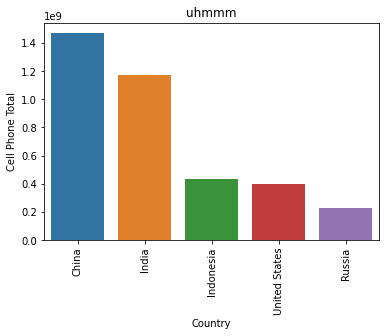

In [32]:
g = sns.barplot(data=final_df, x = 'Country', y='cell_phones_total')
# g.set_yscale('log')
# g.set_ylim(1,16000000000)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Cell Phone Total')
plt.title('uhmmm')

China, India and Indonesia are classfied under Asia. They  account for the largest cell phone totals for 2017. Lets explore the distrubition of cellphone totals across continents in 2017. 


In [22]:
cell_popl_geo_2017_df['Country'].nunique()

194

We need a dataset that consists of the independent countries and has a column that will allows us to easily merge to our existing dataframe.

In [34]:
# https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv
country_continent_url = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
country_continent_df = load_data(country_continent_url)
country_continent_df.head()

Number of dimensions: 2
Shape of dataframe: (194, 2)


,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [38]:
cellTotal_continent_df = pd.merge(cell_popl_geo_2017_df, country_continent_df, how = 'left', on= 'Country')
cellTotal_continent_df.shape

(194, 7)

194 countries, 7 continents. 

In [39]:
cellTotal_continent_df_1 = cellTotal_continent_df[['Country', 'Continent', 'cell_phones_total']].groupby(['Continent']).sum()
cellTotal_continent_df_1

,cell_phones_total
Continent,
Africa,8.874560e+08
Asia,4.469856e+09
Europe,7.272277e+08
North America,2.318152e+08
Oceania,3.915510e+07
South America,4.682090e+08


Text(0.5, 1.0, 'uhmmm')

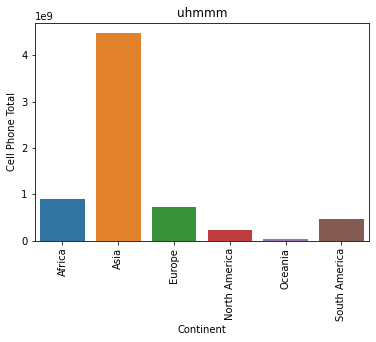

In [40]:
g = sns.barplot(data=cellTotal_continent_df_1, x = cellTotal_continent_df_1.index.values, y='cell_phones_total')
# g.set_yscale('log')
# g.set_ylim(1,16000000000)
plt.xticks(rotation = 90)
plt.xlabel('Continent')
plt.ylabel('Cell Phone Total')
plt.title('uhmmm')

In [42]:
cellTotal_continent_df_1.iat[1,0]/cellTotal_continent_df_1.sum()

cell_phones_total    0.655047
dtype: float64

In [41]:
(cellTotal_continent_df_1.iat[1,0]+cellTotal_continent_df_1.iat[0,0])/cellTotal_continent_df_1.sum()

cell_phones_total    0.785101
dtype: float64

Therefore, Asia contributes to 60% of the cell phones in the world. 